In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 7)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
# lokum gibi data(cicek gibi)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [7]:
df["test_result"].value_counts() # Data Balance mi Unbalance mi?

1    3000
0    2000
Name: test_result, dtype: int64

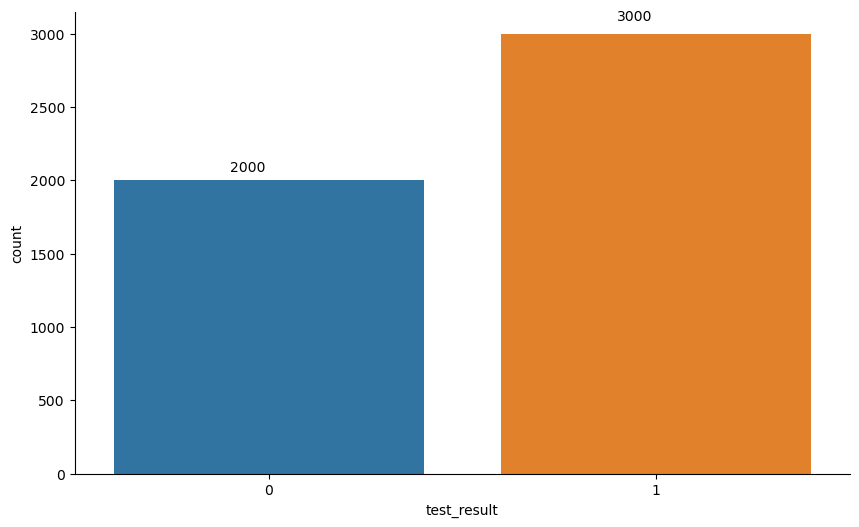

In [8]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

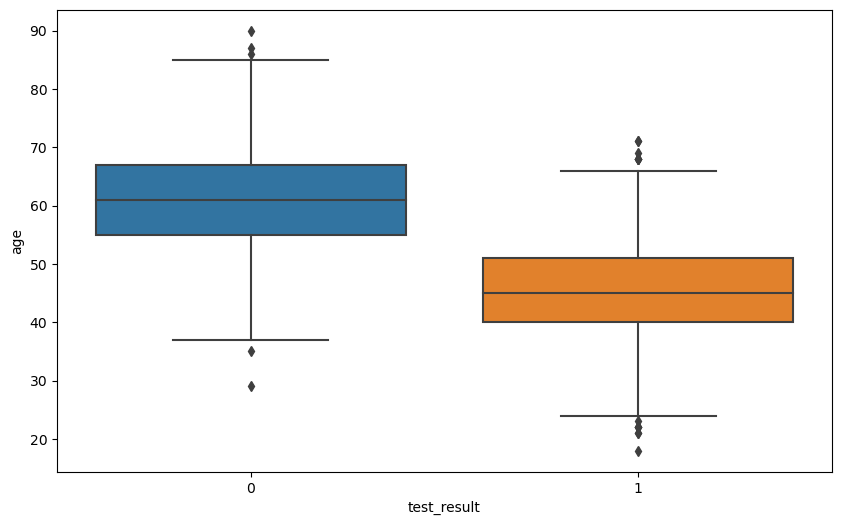

In [9]:
sns.boxplot(x='test_result', y= "age", data=df);

In [10]:
print(sns.__version__) 
# !pip install seaborn==0.11.2
# import seaborn as sns

0.11.2


In [11]:
# !pip install pandas==1.4.3

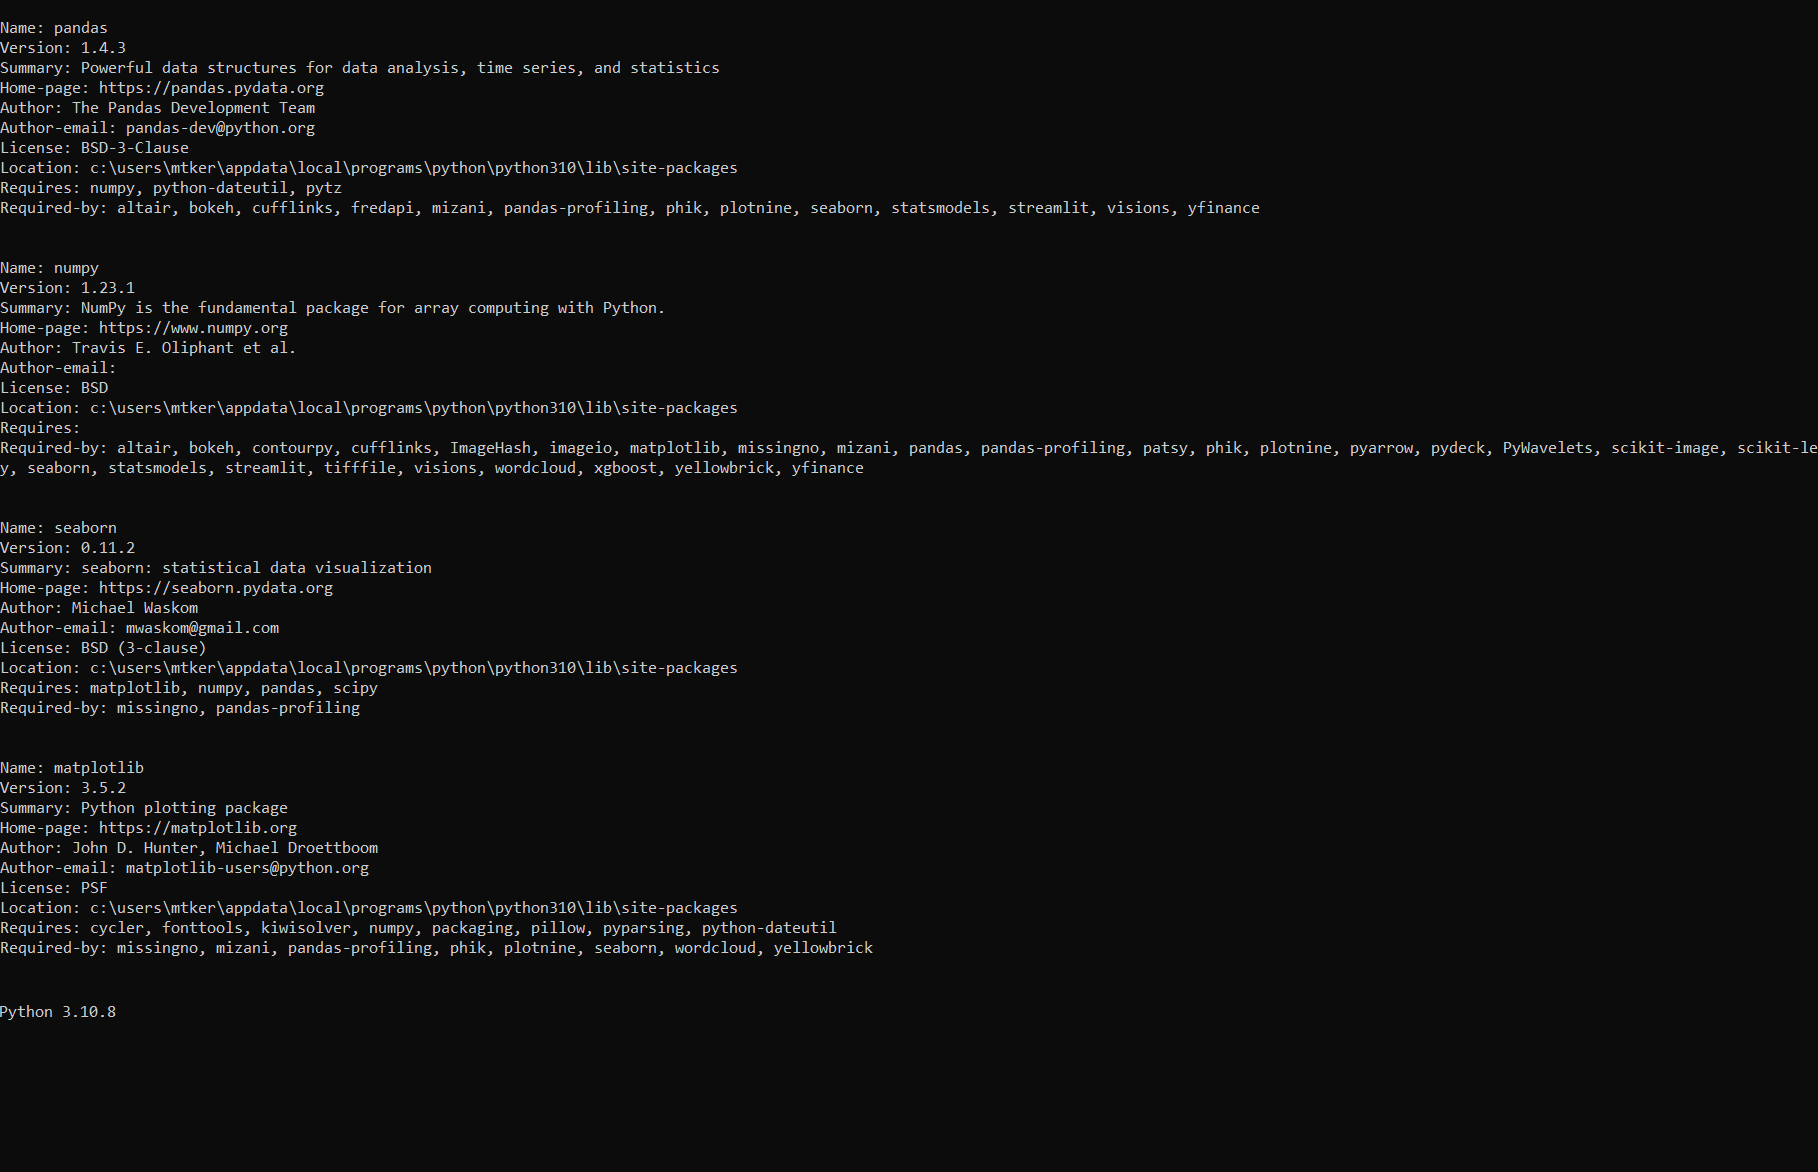

In [12]:
# !pip install numpy==1.23.1

In [13]:
print(np.__version__)

1.21.5


In [14]:
print(pd.__version__)

1.4.4


In [15]:
!pip install numpy==1.23.1


[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


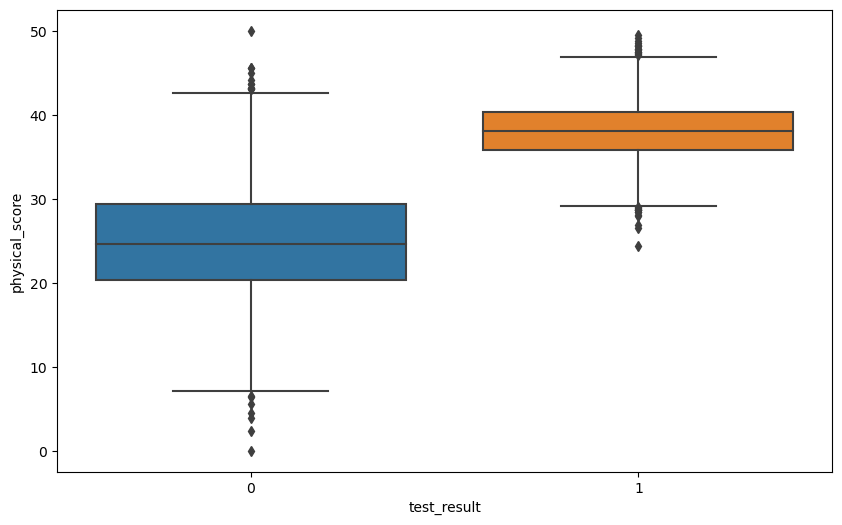

In [16]:
sns.boxplot(x='test_result', y='physical_score', data=df);

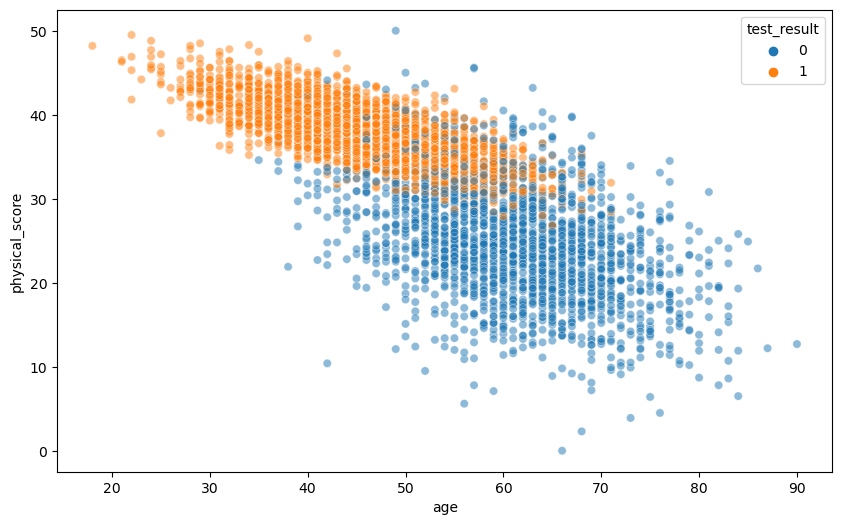

In [17]:
sns.scatterplot(x="age", y="physical_score", data = df, hue = "test_result", alpha = 0.5); ## hue paramtresine her zaman taget ver

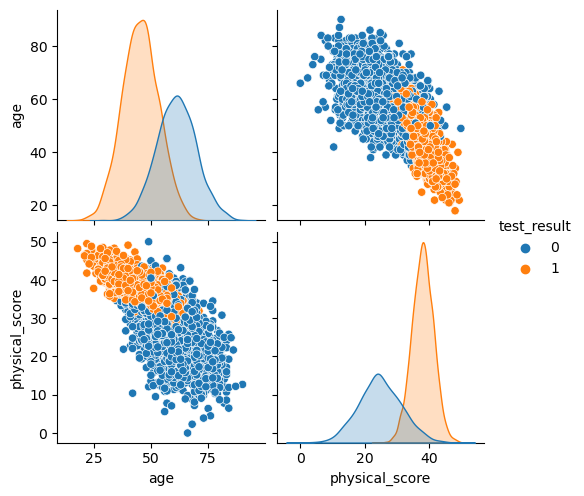

In [18]:
sns.pairplot(df, hue= "test_result");

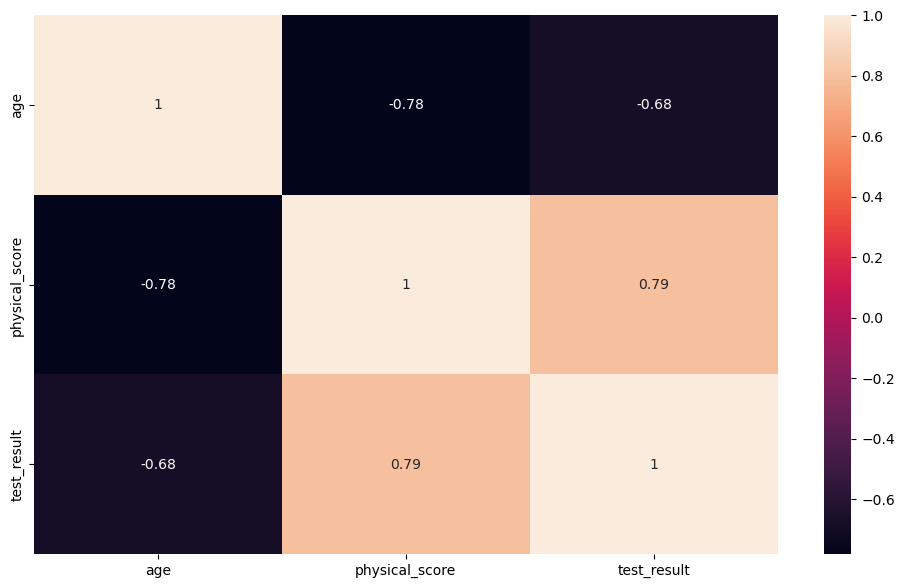

In [21]:
sns.heatmap(df.corr(), annot= True);

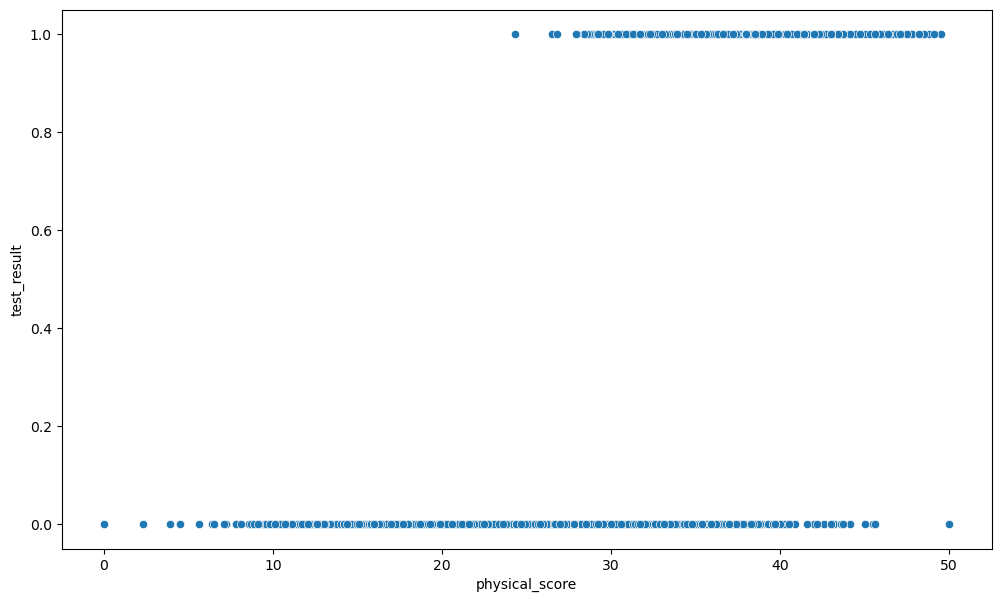

In [22]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

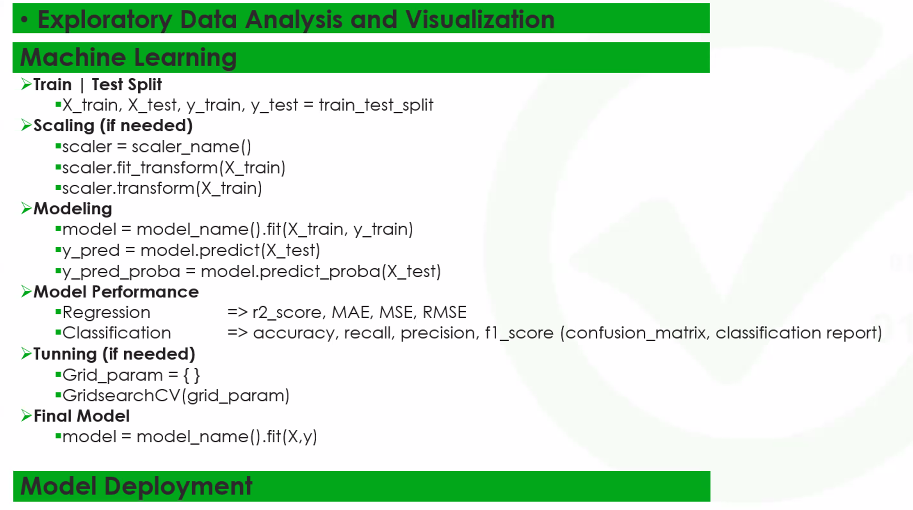

# Train | Test Split and Scaling

In [23]:
X = df.drop("test_result", axis = 1)
y = df["test_result"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# test size == > amacımız train setine eğitim için maximum veri sağlamak olmalı.  ben %20  ile gittim hoca %10 ile

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train) #scale fit işlemini sadece X_train uygulanır
X_test_scaled = scaler.transform(X_test)

# Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_model = LogisticRegression()

In [33]:
log_model.fit(X_train_scaled, y_train) 

LogisticRegression()

In [34]:
log_model.coef_  # Normalde bakmayacaz sadece ilk defa oldugundan bakiyoruz

array([[-0.903313  ,  3.48541689]])